In [1]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

In [2]:
img= cv2.imread('happy.jpg')

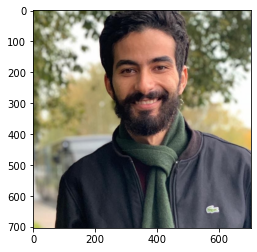

In [3]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [4]:
prediction = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.59it/s]


In [5]:
prediction

{'emotion': {'angry': 0.0001922166802614811,
  'disgust': 5.071519593169427e-09,
  'fear': 0.002635316559462808,
  'happy': 99.31933283805847,
  'sad': 0.002974020935653243,
  'surprise': 0.03749383904505521,
  'neutral': 0.637374259531498},
 'dominant_emotion': 'happy',
 'region': {'x': 213, 'y': 68, 'w': 298, 'h': 298},
 'age': 33,
 'gender': 'Man',
 'race': {'asian': 1.0886415839195251,
  'indian': 6.980866938829422,
  'black': 0.8464818820357323,
  'white': 32.35912621021271,
  'middle eastern': 37.141019105911255,
  'latino hispanic': 21.583867073059082},
 'dominant_race': 'middle eastern'}

In [6]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

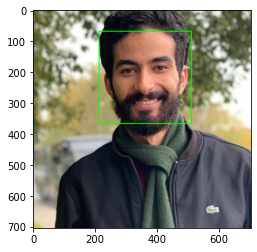

In [7]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

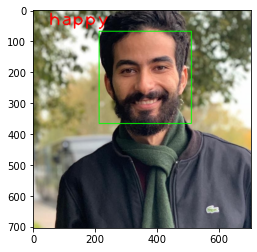

In [8]:
font= cv2.FONT_HERSHEY_PLAIN
cv2.putText(img,
            prediction['dominant_emotion'],
            (50,50),
            font,4,
            (0,0,255),
            3,
            cv2.LINE_4
           );
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot popen webcam')
while True:
    ret,frame=cap.read()
    result=DeepFace.analyze(frame,actions=['emotion'])
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    font = cv2.FONT_HERSHEY_PLAIN  
    cv2.putText(frame,
            result['dominant_emotion'],
            (50,50),
            font,3,
            (0,0,255),
            3,
            cv2.LINE_4
           )
    cv2.imshow('Demo Video',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.62it/s]


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.20it/s]


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.72it/s]


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.65it/s]
